### Stroke/Heart Mortality Rate Trends
__Analysis of data about mortality amongst adults__

## Introduction

__Question: Is there a significant difference in mortalitiy rates between groups baced on race and ethnicity?__

We believe that there is a significant differnce in mortality rates among different groups of people based on assumption. To explore and support this we pulled Heart and Stroke mortality data from the CDC website. We are targeting health care leaders and local authorities that handle budgeting. If our initial assumption is correct, than there is a target group of people that would need extra resources and assistance because their high mortality rates compared to others could inidicate a lack of local funding, ineffective policies, or possible another underlying issue.

## Exploratory Data Analysis

Stroke (2013) - [Stroke Data](https://data.world/us-hhs-gov/12ea7a13-b229-43b4-b19b-1459e9a64d3f)

Heart (2013) - [Heart Data](https://data.world/us-hhs-gov/01969266-32c7-4071-a84e-4fe524d472c2)

Diabetes (2013) - [Diabetes](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3830901/)

Insurance (2013) - [Insurance](https://www.census.gov/library/publications/2014/demo/p60-250.html)

HealthcareExpenditure (2013) - [Expenditure](https://www.kff.org/other/state-indicator/health-spending-per-capita/?currentTimeframe=1&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)

Both Stroke and Heart have similiar data columns. They contain number of deaths per 100,00 population per county in the US. Because of this there are almost 60k rows in each data set. Columns for race/ethnicity and gender are also present.

In [21]:
from DFfunctions import *
from MLfunctions import *

heart = pd.read_csv('heartmortality.csv')
stroke = pd.read_csv('strokemortality.csv')

heart.head(3)

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2013,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,147.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2013,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,229.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2013,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,255.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"


### Data Cleaning

The columns we want to target are the deaths per 100k population, race/ethnicity, and Location by state. By keeping States we will be able to classify specific regions of the US such as the Midwest and use that to find a correlation between race/ethnicity and mortality rates per region. All other columns will be dropped because they do not directly help find an answer to our hypothesis. Since both data sets only contain information for one year, we can not find anything related to date and time frame. Furthermore, the various geolocation columns will be dropped since we are using the States to classify a region.

In [7]:
heartNotUsed = ['Year','LocationDesc','GeographicLevel','DataSource','Class','Topic','Data_Value_Unit','Data_Value_Type',
                 'StratificationCategory1','Data_Value_Footnote_Symbol','StratificationCategory2',
                 'TopicID','LocationID','Location 1']
heartDf = removeC(heart, heartNotUsed)

strokeNotUsed = ['Year','LocationDesc','DataSource','Class','Topic','Data_Value_Unit','Data_Value_Type',
                 'StratificationCategory1','Data_Value_Footnote_Symbol','StratificationCategory2',
                 'TopicID','LocationID','Y_lat','X_lon','GeographicLevel']
strokeDf = removeC(stroke, strokeNotUsed)

Data column names will be renamed to clearly display the information we are targeting and rows that have incomplete values will be dropped.

In [22]:
heartDf = heartDf.rename(columns = {'Data_Value': 'Deaths per 100,000', 'Data_Value_Footnote': 'Sufficiency?'
                               ,'Stratification1': 'Gender', 'Stratification2': 'Race/Ethnicity'})

strokeDf = strokeDf.rename(columns = {'Data_Value': 'Deaths per 100,000', 'Data_Value_Footnote': 'Sufficiency?'
                                 ,'Stratification1': 'Gender','Stratification2': 'Race/Ethnicity'})

# Filtering data to obtain overall results for gender and clear any insufficient data from our dataset
heartDf = getSufficientData(heartDf)
strokeDf = getSufficientData(strokeDf)

notWanted = ['Sufficiency', 'Sufficiency?', 'Gender']

heartUpdated = removeC(heartDf, notWanted)
strokeUpdated = removeC(strokeDf, notWanted)

strokeUpdated.head(3)

,LocationAbbr,"Deaths per 100,000",Race/Ethnicity
89,AK,55.7,White
90,AK,70.0,White
92,AK,73.3,White


What we are left with is a data set that contains Location, Deaths per 100k, and our target columns Race/Ethnicity, These columns can now be used to find correalations of mortality rates and ethnicity. For our intdended scope we now have a complete data set that we can continue to visualize since we can transform the deaths column to averages of deaths per race and ethnicity. In our case we have White, Black, Hispanics, Asian and Pacific Islanders, and American Indian and Alaskan Native present in our data.

## Visualizations

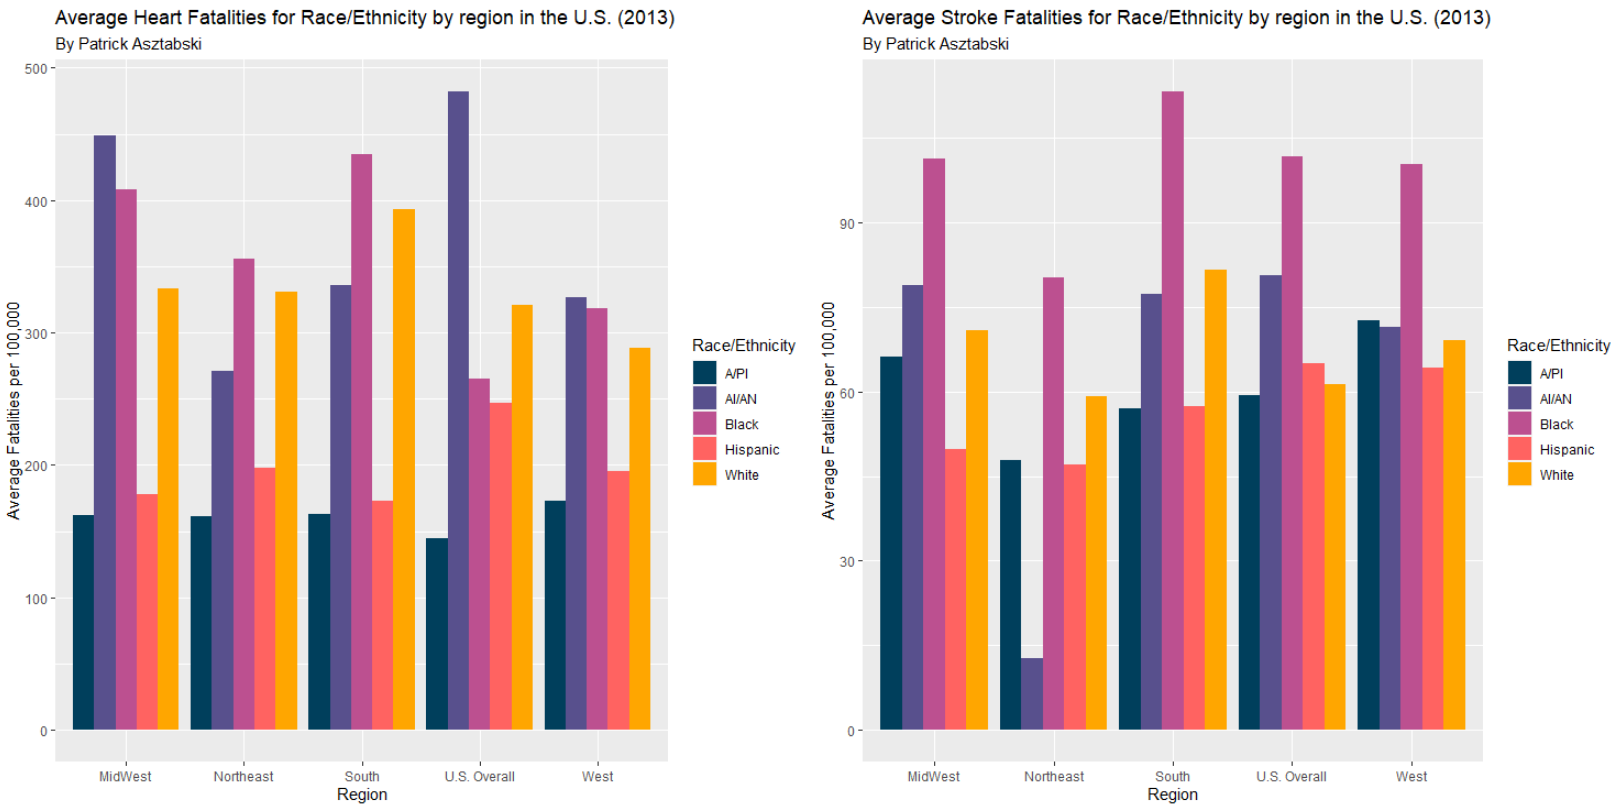

Mortality trends here are based on median and regions are reflected by the U.S. Census Bureau views. We want to find if there are significant differences in the distributions of data for each race/ethnicity. In our statistical analysis, we found that every distribution was skewed to the right, which signals that the median is more accurate of the distribution than the mean. However, are the differences? This is where we use the kruskal-wallis rank sum test that is non-parametric (doesn't rely on normal distribution) and uses the median.

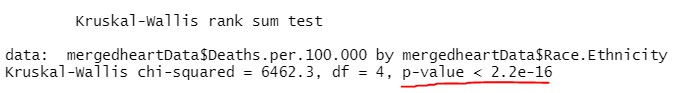
Hypotheses from Median Model

H_0: me_A/PI = me_AI/AN = me_Black = me_Hispanic = me_White

H_1: at least one of the medians is different

In both datasets, p-value is incredibly small as seen underlined in red. Reject H_0 and conclude that at least one median is statistically different, but which groups have differences? Use a poc-host test to compare between groups.


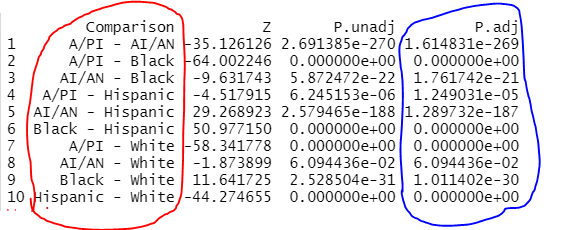

 H_0: me_group1 = me_group2
 
 H_1: medians between two groups are not the same
 
In red, we can see the comparisons being tested.
For every comparison, p-value is small for every comparison as circled in blue, so we reject H_0.  
Conclude median is different statistically for each group. We repeated the results in stroke and found the same results
There is a significant difference in the median mortalities for stroke and heart for every race races.


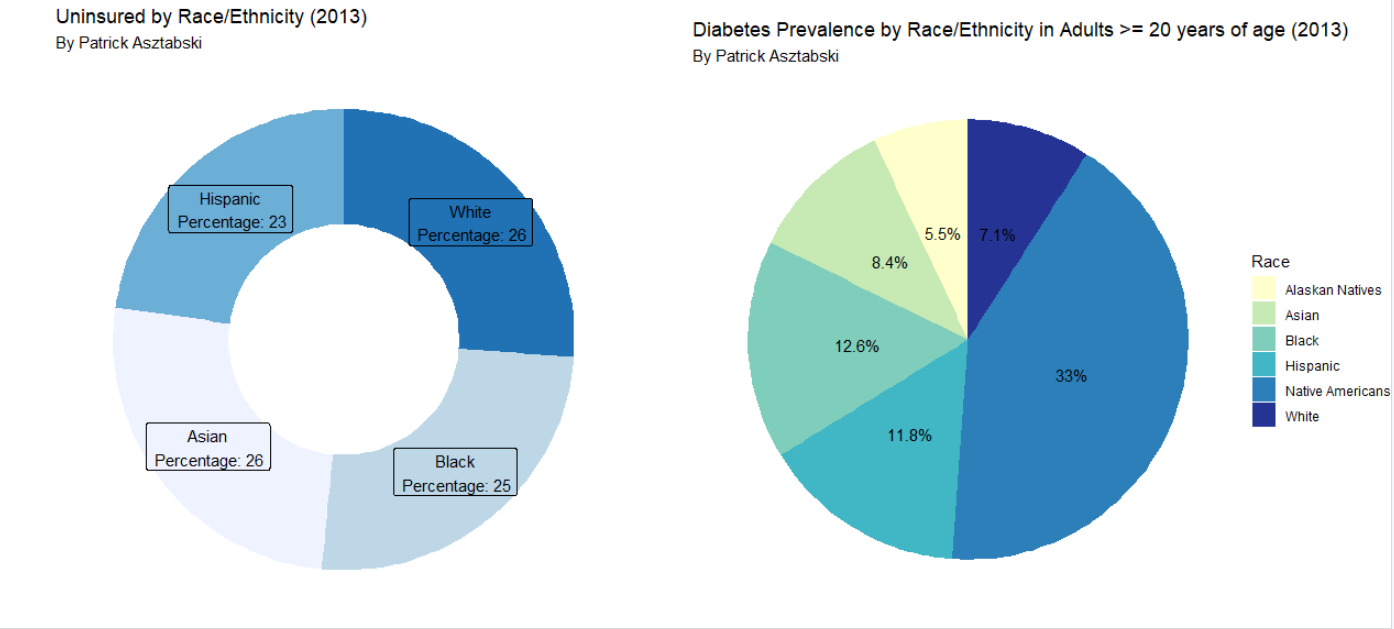

While there are a multitude of factors that we discussed about, including health, socioeconomic factors, and financial problems, we focused on both the financial and health aspect for our findings. Here, we can see there are still a significant proportion of people in every race that do not have access to healthcare coverage. This leads people to avoid seeking healthcare solutions due to expensive healthcare services. In our diabetes prevalence pie chart, we can see that the AI/AN group has the highest percentage for having diabetes. This explains why there are a significant number of heart fatality deaths for the AI/AN group in our previous visualization, as people with diabetes are twice as likely to have heart disease.

https://public.tableau.com/shared/QS79DJXNJ?:display_count=n&:origin=viz_share_link

In this interactive link, we covered health expenditure per capita by region to find possible links between mortality trends and region spending. We did indeed find that the Northeast region has the highest spending, and the least fatalities in both heart and stroke fatalities. We also found that regions with less spending have worst overall mortality trends as reflected in the visualizations above.

## ML/Stats model 

### ML Model KNeighborsClassifier

For the ML model, another data set was used that contained information on patients. This dataset specifically contained heart related data such as cholesterol levels to predict the chance of heart attack. The intended goal of using this dataset and ML model was to find causes of heart attack and correlate it to why there are significant differences in mortality trends.

In [23]:
heartML = pd.read_csv("heartML.csv")
heartMLNotUsed = ['age', 'sex']
heartML = removeC(heartML, heartMLNotUsed)
heartML = heartML.rename(columns = {'cp':'chest_pain','trtbps': 'resting_bp(mmhg)','chol': 'cholestoral(mg/dl)','fbs': 'fasting_blood_sugar(1/0)',
                                    'thalachh': 'max_heart_rate','exng': 'exercise_anigna(1/0)','caa': 'num_major_vessels(0-3)'
                                    })
heartML.drop_duplicates(inplace=True)
heartML.head(3)

,chest_pain,resting_bp(mmhg),cholestoral(mg/dl),fasting_blood_sugar(1/0),restecg,max_heart_rate,exercise_anigna(1/0),oldpeak,slp,num_major_vessels(0-3),thall,output
0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1,130,204,0,0,172,0,1.4,2,0,2,1


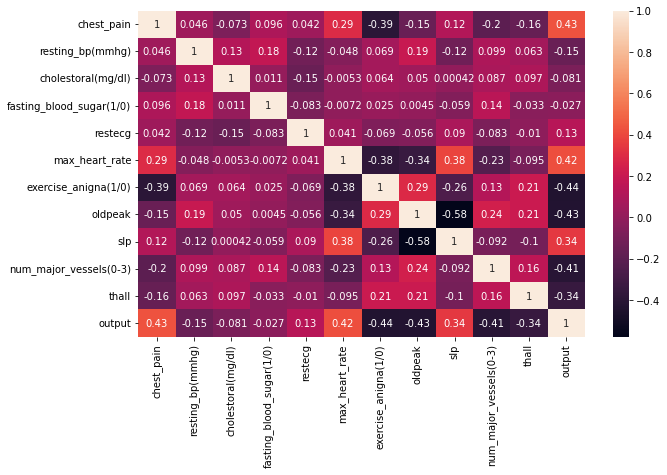

In [14]:
plt.figure(figsize = (10,6))
sns.heatmap(heartML.corr(), annot = True)
plt.show()

# ML Model : KNN Classifier

Our model works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels. Our model takes in the mode of the calculated dataset, which yields 57% accuracy in testing the dataset.<br>
Further our macro averages for precision (the values that the model thought were correct) is 0.78, our recall value (the values identified correctly by the model) is 0.58, our F1 score (the harmonic mean between precision and recall) is 0.43, and support value (the number of the true responses that lie in our class) 0.61.

In [17]:
model = KNeighborsClassifier()

# preprocessing the dataset
X = heartML.iloc[:,heartML.columns != 'output']
y = heartML.output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

# standard scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test)

# Training the model
model.fit(X_train_scaled, y_train)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        28
           1       0.56      1.00      0.72        33

    accuracy                           0.57        61
   macro avg       0.78      0.54      0.43        61
weighted avg       0.76      0.57      0.45        61



Text(0.5, -3.0, 'Predicted Values')

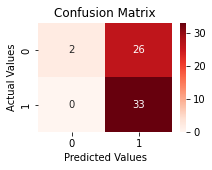

In [20]:
# confusion matrix

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(3,2))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

## Conclusion

We found a significant difference in medians when it came to mortality trends, so it essentially boiled down to figuring out what factors affected mortality trends. As said, there are a multitude of factors that affect mortality trends, and we attempted to find these factors in both the health and financial aspects of why mortality trend occurs. We concluded that healthcare coverage rates, diabetes prevalence, and healthcare expenditure were all vital factors in determining mortality trends, and we believe that it doesn't stop there. 

We urge policymakers to be aware of these factors and help Americans gain more access to healthcare and allow a bigger budget for healthcare expenditure. We also urge healthcare leaders to emphasize the need to bring awarenes for health factors that propel mortality trends, specifically targetting diabetes prevalence among the AI/AN group.

While we identified some of the factors that affect mortality trends, we believe that socioeconomic factors also play a role in mortality trends as wealth allows people to gain greater quality of care without worrying about the costs.